
# Project: Investigate Soccer Database
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_country = pd.read_csv('Country.csv')
df_league = pd.read_csv('League.csv')
df_match = pd.read_csv('Match.csv')
df_player = pd.read_csv('Player.csv')
df_team = pd.read_csv('Team.csv')

print(df_match.info())
print(df_player.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB
None


#### check type of column 'date' into dataframe df_match

In [4]:
df_match.date.dtypes

dtype('O')

#### check types of column 'birthday' into dataframe df_player

In [5]:
df_player.birthday.dtypes

dtype('O')

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Change the type of columns 'date' and 'birthday' into datetime)

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section
pd.to_datetime(df_match['date'])
pd.to_datetime(df_player['birthday'])

0       1992-02-29
1       1989-12-15
2       1991-05-13
3       1982-05-08
4       1979-11-08
           ...    
11055   1979-04-03
11056   1986-12-18
11057   1979-04-29
11058   1981-10-06
11059   1982-06-05
Name: birthday, Length: 11060, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 : who is the most effective team in attack and defense, who is the team that concedes the most goals?

In [7]:
## get the useful columns of df_match into another dataframe for the exploratory

df_match1 = df_match[['country_id','league_id','season','stage','date','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']]
df_match1.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [8]:
## get the name of each league by merging df_match1 with df_league
df_match2 = pd.merge(df_match1, df_league, left_on='league_id',right_on='country_id', how='left')

## get the name of the home team by merging df_match2 with df_team
df_match3 = pd.merge(df_match2, df_team, left_on='home_team_api_id', right_on='team_api_id',how='left')
df_match3.head()

,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_x,country_id_y,name,id_y,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,1,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,1,Belgium Jupiler League,3,10000,15005.0,SV Zulte-Waregem,ZUL
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,1,1,Belgium Jupiler League,5,9984,1750.0,KSV Cercle Brugge,CEB
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1,1,Belgium Jupiler League,7,9991,674.0,KAA Gent,GEN
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,1,1,Belgium Jupiler League,9,7947,NaN,FCV Dender EH,DEN


In [9]:
## drop the duplicated columns with the same value on df_match3
df_match3.drop(columns=['country_id_x','id_x','country_id_y','id_y','team_short_name'], inplace=True)

## rename the column team_long_name to home_team on df_match3
df_match3.rename(columns={'team_long_name': 'home_team'}, inplace=True)
df_match3.head()

,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name,team_api_id,team_fifa_api_id,home_team
0,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium Jupiler League,9987,673.0,KRC Genk
1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium Jupiler League,10000,15005.0,SV Zulte-Waregem
2,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium Jupiler League,9984,1750.0,KSV Cercle Brugge
3,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium Jupiler League,9991,674.0,KAA Gent
4,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium Jupiler League,7947,NaN,FCV Dender EH


In [10]:
## get the name of the away team by merging df_match3 with df_team
df_match4 = pd.merge(df_match3, df_team, left_on='away_team_api_id', right_on='team_api_id',how='left')

## drop the duplicated columns with the same value on df_match4
df_match4.drop(columns=['team_short_name','team_api_id_x','id','team_api_id_y'],inplace=True)

## rename the column team_long_name to away_team on df_match4
df_match4.rename(columns={'team_long_name': 'away_team'}, inplace=True)
df_match4.tail()

,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name,team_fifa_api_id_x,home_team,team_fifa_api_id_y,away_team
25974,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,Switzerland Super League,898.0,FC St. Gallen,1715.0,FC Thun
25975,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,Switzerland Super League,286.0,FC Vaduz,897.0,FC Luzern
25976,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,Switzerland Super League,322.0,Grasshopper Club Zürich,110770.0,FC Sion
25977,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,Switzerland Super League,NaN,Lugano,894.0,FC Zürich
25978,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,3,Switzerland Super League,900.0,BSC Young Boys,896.0,FC Basel


#### get the england league

In [11]:
england_league= df_match4.query('(name=="England Premier League")')
england_league.home_team.unique()

array(['Manchester United', 'Arsenal', 'Sunderland', 'West Ham United',
       'Aston Villa', 'Everton', 'Middlesbrough', 'Bolton Wanderers',
       'Hull City', 'Chelsea', 'Stoke City', 'Liverpool',
       'Newcastle United', 'Fulham', 'Tottenham Hotspur',
       'West Bromwich Albion', 'Portsmouth', 'Manchester City',
       'Blackburn Rovers', 'Wigan Athletic', 'Wolverhampton Wanderers',
       'Burnley', 'Birmingham City', 'Blackpool', 'Queens Park Rangers',
       'Norwich City', 'Swansea City', 'Reading', 'Southampton',
       'Crystal Palace', 'Cardiff City', 'Leicester City', 'Bournemouth',
       'Watford'], dtype=object)

In [12]:
england_league.shape

(3040, 14)

#### get the win game by home_team

In [13]:
home_point= england_league.query('home_team_goal >away_team_goal')
home_point.shape

(1390, 14)

#### add a column home_point and away_point, fill with "3" for the home win and "0" for the home lost games

In [14]:
point_win = np.repeat(3,1390)
home_point['home_point'] = point_win
point_lost = np.repeat(0,1390)
home_point['away_point'] = point_lost
home_point

C:\Users\Tina\AppData\Local\Temp\ipykernel_23176\1530143173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_point['home_point'] = point_win
C:\Users\Tina\AppData\Local\Temp\ipykernel_23176\1530143173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_point['away_point'] = point_lost


,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name,team_fifa_api_id_x,home_team,team_fifa_api_id_y,away_team,home_point,away_point
1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0,England Premier League,1.0,Arsenal,109.0,West Bromwich Albion,3,0
1731,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,England Premier League,19.0,West Ham United,1917.0,Wigan Athletic,3,0
1732,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,England Premier League,2.0,Aston Villa,10.0,Manchester City,3,0
1734,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,2,1,England Premier League,12.0,Middlesbrough,18.0,Tottenham Hotspur,3,0
1735,1729,2008/2009,1,2008-08-16 00:00:00,489049,8559,10194,3,1,England Premier League,4.0,Bolton Wanderers,1806.0,Stoke City,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,1729,2015/2016,8,2015-10-03 00:00:00,1988786,8456,10261,6,1,England Premier League,10.0,Manchester City,13.0,Newcastle United,3,0
4758,1729,2015/2016,9,2015-10-17 00:00:00,1988790,8455,10252,2,0,England Premier League,5.0,Chelsea,2.0,Aston Villa,3,0
4761,1729,2015/2016,9,2015-10-17 00:00:00,1988793,8456,8678,5,1,England Premier League,10.0,Manchester City,1943.0,Bournemouth,3,0
4762,1729,2015/2016,9,2015-10-18 00:00:00,1988794,10261,9850,6,2,England Premier League,13.0,Newcastle United,1792.0,Norwich City,3,0


#### get the lost game from home

In [15]:
away_point= england_league.query('home_team_goal < away_team_goal')
away_point.shape

(867, 14)

#### add column away_point and home_point, fill with "3" with the away win and "0" for the away lost games

In [16]:
point_win = np.repeat(3,867)
away_point['away_point'] = point_win
point_lost = np.repeat(0,867)
away_point['home_point'] = point_lost
away_point

C:\Users\Tina\AppData\Local\Temp\ipykernel_23176\1908531550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_point['away_point'] = point_win
C:\Users\Tina\AppData\Local\Temp\ipykernel_23176\1908531550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_point['home_point'] = point_lost


,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name,team_fifa_api_id_x,home_team,team_fifa_api_id_y,away_team,away_point,home_point
1730,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,England Premier League,106.0,Sunderland,9.0,Liverpool,3,0
1733,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,3,England Premier League,7.0,Everton,3.0,Blackburn Rovers,3,0
1741,1729,2008/2009,10,2008-10-29 00:00:00,489135,8559,8668,0,1,England Premier League,4.0,Bolton Wanderers,7.0,Everton,3,0
1742,1729,2008/2009,10,2008-10-29 00:00:00,489136,8667,8455,0,3,England Premier League,1952.0,Hull City,5.0,Chelsea,3,0
1755,1729,2008/2009,11,2008-11-01 00:00:00,489149,8462,8528,1,2,England Premier League,1790.0,Portsmouth,1917.0,Wigan Athletic,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,1729,2015/2016,8,2015-10-03 00:00:00,1988787,9850,8197,1,2,England Premier League,1792.0,Norwich City,95.0,Leicester City,3,0
4759,1729,2015/2016,9,2015-10-17 00:00:00,1988791,9826,8654,1,3,England Premier League,1799.0,Crystal Palace,19.0,West Ham United,3,0
4760,1729,2015/2016,9,2015-10-17 00:00:00,1988792,8668,10260,0,3,England Premier League,7.0,Everton,11.0,Manchester United,3,0
4764,1729,2015/2016,9,2015-10-19 00:00:00,1988796,10003,10194,0,1,England Premier League,1960.0,Swansea City,1806.0,Stoke City,3,0


#### get the tie game

In [17]:
nul_point= england_league.query('home_team_goal == away_team_goal')
nul_point.shape

(783, 14)

#### add columns away_point and home_point, fill the two columns with "1"

In [18]:
point_null = np.repeat(1,783)
nul_point['away_point'] = point_null
nul_point['home_point'] = point_null

C:\Users\Tina\AppData\Local\Temp\ipykernel_23176\1391521998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nul_point['away_point'] = point_null
C:\Users\Tina\AppData\Local\Temp\ipykernel_23176\1391521998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nul_point['home_point'] = point_null


#### merge the dataframe home_point and away_point and nul_point to one dataframe

In [19]:
home_and_away = home_point.append(away_point)
total_point = home_and_away.append(nul_point)

C:\Users\Tina\AppData\Local\Temp\ipykernel_23176\2145618189.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  home_and_away = home_point.append(away_point)
C:\Users\Tina\AppData\Local\Temp\ipykernel_23176\2145618189.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_point = home_and_away.append(nul_point)


#### Check the total if is the same as the number of row on the dataframe england league

In [20]:
total_point.head()

,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name,team_fifa_api_id_x,home_team,team_fifa_api_id_y,away_team,home_point,away_point
1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0,England Premier League,1.0,Arsenal,109.0,West Bromwich Albion,3,0
1731,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,England Premier League,19.0,West Ham United,1917.0,Wigan Athletic,3,0
1732,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,England Premier League,2.0,Aston Villa,10.0,Manchester City,3,0
1734,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,2,1,England Premier League,12.0,Middlesbrough,18.0,Tottenham Hotspur,3,0
1735,1729,2008/2009,1,2008-08-16 00:00:00,489049,8559,10194,3,1,England Premier League,4.0,Bolton Wanderers,1806.0,Stoke City,3,0


In [21]:
total_point.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 1729 to 4765
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   league_id           3040 non-null   int64  
 1   season              3040 non-null   object 
 2   stage               3040 non-null   int64  
 3   date                3040 non-null   object 
 4   match_api_id        3040 non-null   int64  
 5   home_team_api_id    3040 non-null   int64  
 6   away_team_api_id    3040 non-null   int64  
 7   home_team_goal      3040 non-null   int64  
 8   away_team_goal      3040 non-null   int64  
 9   name                3040 non-null   object 
 10  team_fifa_api_id_x  3040 non-null   float64
 11  home_team           3040 non-null   object 
 12  team_fifa_api_id_y  3040 non-null   float64
 13  away_team           3040 non-null   object 
 14  home_point          3040 non-null   int32  
 15  away_point          3040 non-null   int32  
dtypes: 

In [22]:
england_league.shape

(3040, 14)

#### get the number of season, each team of each season, and the total of points by each team on each season

In [23]:
home_classment = total_point.sort_values(by='season', ascending=True).groupby(['season','home_team']).home_point.sum()
away_classment = total_point.sort_values(by='season', ascending=True).groupby(['season','away_team']).away_point.sum()
classment = home_classment+away_classment
classment = classment.reset_index()
classment.rename(columns={'home_team':'team',0:'points'}, inplace=True)
classment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  160 non-null    object
 1   team    160 non-null    object
 2   points  160 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 3.2+ KB


In [24]:
classment.head()

,season,team,points
0,2008/2009,Arsenal,72
1,2008/2009,Aston Villa,62
2,2008/2009,Blackburn Rovers,41
3,2008/2009,Bolton Wanderers,41
4,2008/2009,Chelsea,83


In [25]:
classment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  160 non-null    object
 1   team    160 non-null    object
 2   points  160 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 3.2+ KB


In [26]:
# get the total point, goal and goal conceded in home match by each team
m1= total_point.sort_values(by='season', ascending=True).groupby(['season','home_team'])['home_point','home_team_goal','away_team_goal'].sum().reset_index()

#rename columns of the dataframe m1
m1.rename(columns={'home_team':'team', 'home_point':'point', 'home_team_goal':'goal','away_team_goal':'goal_conceded'}, inplace=True)
m1

C:\Users\Tina\AppData\Local\Temp\ipykernel_23176\4105017299.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m1= total_point.sort_values(by='season', ascending=True).groupby(['season','home_team'])['home_point','home_team_goal','away_team_goal'].sum().reset_index()


,season,team,point,goal,goal_conceded
0,2008/2009,Arsenal,38,31,16
1,2008/2009,Aston Villa,30,27,21
2,2008/2009,Blackburn Rovers,25,22,23
3,2008/2009,Bolton Wanderers,26,21,21
4,2008/2009,Chelsea,39,33,12
...,...,...,...,...,...
155,2015/2016,Swansea City,30,20,20
156,2015/2016,Tottenham Hotspur,36,35,15
157,2015/2016,Watford,24,20,19
158,2015/2016,West Bromwich Albion,23,20,26


In [27]:
# get the total point, goal and goal conceded in away match by each team
m2= total_point.sort_values(by='season', ascending=True).groupby(['season','away_team'])['away_point','away_team_goal','home_team_goal'].sum().reset_index()

#rename columns of the dataframe m
m2.rename(columns={'away_team':'team', 'away_point':'point', 'away_team_goal':'goal','home_team_goal':'goal_conceded'}, inplace=True)
m2

C:\Users\Tina\AppData\Local\Temp\ipykernel_23176\2992675752.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m2= total_point.sort_values(by='season', ascending=True).groupby(['season','away_team'])['away_point','away_team_goal','home_team_goal'].sum().reset_index()


,season,team,point,goal,goal_conceded
0,2008/2009,Arsenal,34,37,21
1,2008/2009,Aston Villa,32,27,27
2,2008/2009,Blackburn Rovers,16,18,37
3,2008/2009,Bolton Wanderers,15,20,32
4,2008/2009,Chelsea,44,35,12
...,...,...,...,...,...
155,2015/2016,Swansea City,17,22,32
156,2015/2016,Tottenham Hotspur,34,34,20
157,2015/2016,Watford,21,20,31
158,2015/2016,West Bromwich Albion,20,14,22


In [28]:
#merge m1 and m2 to get the total home point, home goal, away point, away goal, home_goal_conceded and away goal conceded by each team
total_goal = pd.merge(m1, m2, left_on=['season','team'], right_on=['season','team'], how='inner')

#rename the columns of total_goal
total_goal.rename(columns={'point_x':'home_point','goal_x':'home_goal','goal_conceded_x':'home_goal_conceded', 'point_y':'away_point', 'goal_y':'away_goal','goal_conceded_y':'away_goal_conceded'}, inplace=True)

#create columns and set it to the total point of each team
total_goal['total_point'] = total_goal['home_point']+total_goal['away_point']

#create columns and set it to the total goal of each team
total_goal['total_goal'] = total_goal['home_goal']+total_goal['away_goal']

#create columns and set it to the total goal conceded by each team
total_goal['total_conceded_goal'] = total_goal['home_goal_conceded']+total_goal['away_goal_conceded']
total_goal

,season,team,home_point,home_goal,home_goal_conceded,away_point,away_goal,away_goal_conceded,total_point,total_goal,total_conceded_goal
0,2008/2009,Arsenal,38,31,16,34,37,21,72,68,37
1,2008/2009,Aston Villa,30,27,21,32,27,27,62,54,48
2,2008/2009,Blackburn Rovers,25,22,23,16,18,37,41,40,60
3,2008/2009,Bolton Wanderers,26,21,21,15,20,32,41,41,53
4,2008/2009,Chelsea,39,33,12,44,35,12,83,68,24
...,...,...,...,...,...,...,...,...,...,...,...
155,2015/2016,Swansea City,30,20,20,17,22,32,47,42,52
156,2015/2016,Tottenham Hotspur,36,35,15,34,34,20,70,69,35
157,2015/2016,Watford,24,20,19,21,20,31,45,40,50
158,2015/2016,West Bromwich Albion,23,20,26,20,14,22,43,34,48


In [29]:
#get the mean of total goal by each team
moyen_goal = total_goal.groupby(['team']).total_goal.mean().reset_index()

#get the mean of total goal conceded by each team
moyen_conceded_goal = total_goal.groupby(['team']).total_conceded_goal.mean().reset_index()

In [30]:
moyen_scored_conceded_goal = pd.merge(moyen_goal,moyen_conceded_goal, left_on='team', right_on='team', how='inner')
moyen_scored_conceded_goal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 34 non-null     object 
 1   total_goal           34 non-null     float64
 2   total_conceded_goal  34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [31]:
goal_locations = np.arange(len(moyen_scored_conceded_goal))
goal_locations
goal_labels = moyen_scored_conceded_goal.team

Text(0.5, 1.0, ' mean of goal scored by each team')

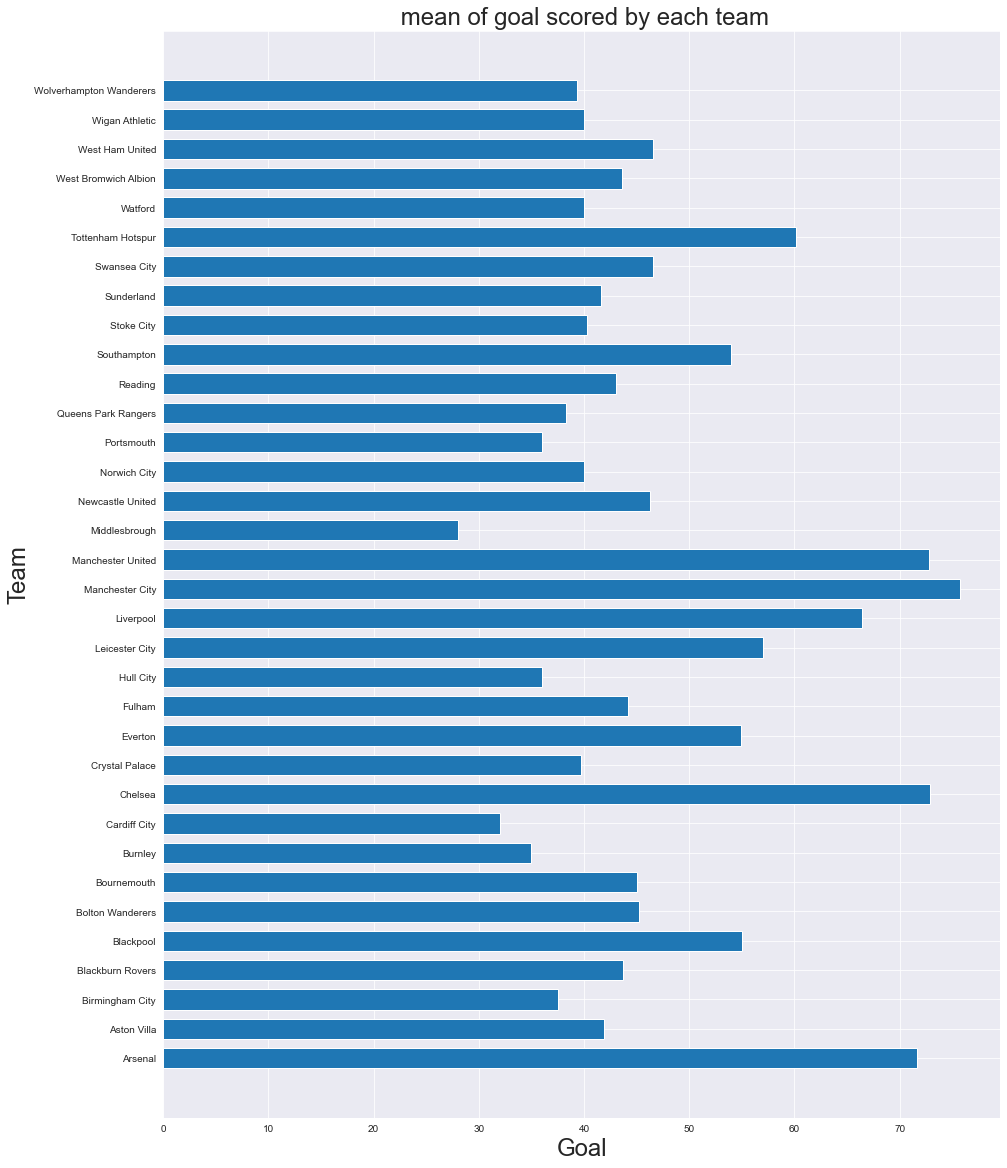

In [32]:
fig, ax = plt.subplots(figsize=(15,20))
plt.barh(moyen_scored_conceded_goal.team,moyen_scored_conceded_goal.total_goal, height = 0.7)
plt.xlabel('Goal', fontsize = 24)
plt.ylabel('Team', fontsize = 24)
plt.title(' mean of goal scored by each team', fontsize="24")

Text(0.5, 1.0, ' mean of goal conceded by each team')

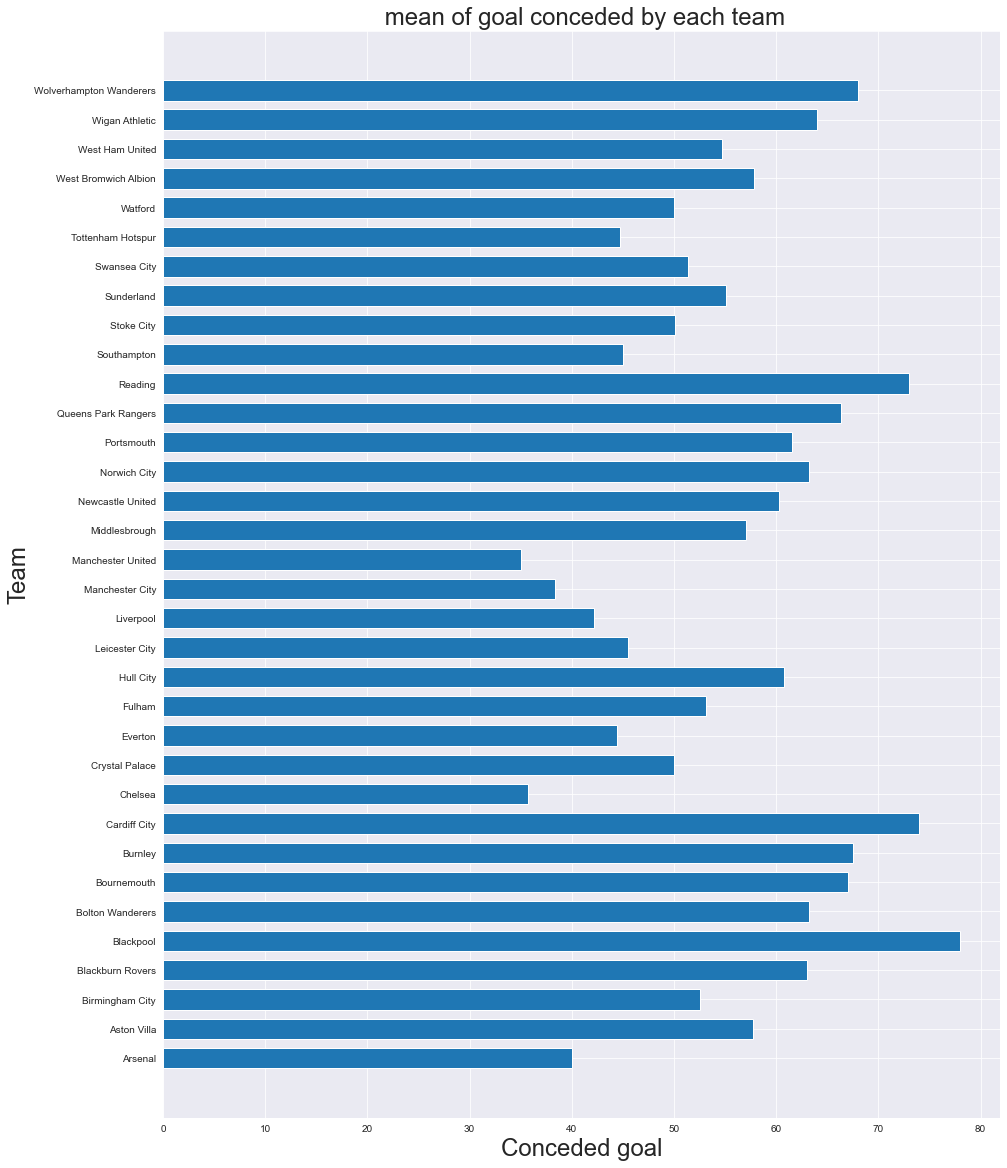

In [33]:
fig, ax = plt.subplots(figsize=(15,20))
plt.barh(moyen_scored_conceded_goal.team,moyen_scored_conceded_goal.total_conceded_goal, height = 0.7)
plt.xlabel('Conceded goal', fontsize = 24)
plt.ylabel('Team', fontsize = 24)
plt.title(' mean of goal conceded by each team', fontsize="24")

### Research Question 2 : Who is the team that has progressed the most, who has regressed the most, who are the teams that have gone up to the first league? who have gone down to the lower league?

In [34]:
classment =classment.sort_values(by=['season','points'], ascending=(1,0))
moyen_part1 = classment.query('season in ("2008/2009","2009/2010","2010/2011","2011/2012")').groupby('team').points.mean()
moyen_part1.info()

<class 'pandas.core.series.Series'>
Index: 27 entries, Arsenal to Wolverhampton Wanderers
Series name: points
Non-Null Count  Dtype  
--------------  -----  
27 non-null     float64
dtypes: float64(1)
memory usage: 432.0+ bytes


#### get the mean of points by each team on the second part of all seasons (2012/2013 to 2015/2016)

In [35]:
moyen_part2 = classment.query('season in ("2012/2013","2013/2014","2014/2015","2015/2016")').groupby('team').points.mean()
moyen_part2.info()

<class 'pandas.core.series.Series'>
Index: 27 entries, Arsenal to Wigan Athletic
Series name: points
Non-Null Count  Dtype  
--------------  -----  
27 non-null     float64
dtypes: float64(1)
memory usage: 432.0+ bytes


#### Merge the moyen_part1, moyen_part2 to get the mean of the to season part on one dataframe

In [36]:
Moyen = pd.merge(moyen_part1, moyen_part2, left_on='team', right_on='team', how='outer')
Moyen.isnull().sum()

points_x    7
points_y    7
dtype: int64

#### fill the null value with "0" for teams which still not in premier league on the first part seasons and the teams relegated the second part seasons

In [37]:
Moyen = Moyen.fillna(0)

## Rename the columns
Moyen.rename(columns={'points_x': 'moyenne_periode1','points_y':'moyenne_periode2'}, inplace=True)
Moyen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Arsenal to Watford
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   moyenne_periode1  34 non-null     float64
 1   moyenne_periode2  34 non-null     float64
dtypes: float64(2)
memory usage: 816.0+ bytes


#### build the report x values with each Team name

In [38]:
locations = np.arange(len(Moyen))
locations
labels = Moyen.index
width = 0.25
labels

Index(['Arsenal', 'Aston Villa', 'Birmingham City', 'Blackburn Rovers',
       'Blackpool', 'Bolton Wanderers', 'Burnley', 'Chelsea', 'Everton',
       'Fulham', 'Hull City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Middlesbrough', 'Newcastle United',
       'Norwich City', 'Portsmouth', 'Queens Park Rangers', 'Stoke City',
       'Sunderland', 'Swansea City', 'Tottenham Hotspur',
       'West Bromwich Albion', 'West Ham United', 'Wigan Athletic',
       'Wolverhampton Wanderers', 'Bournemouth', 'Cardiff City',
       'Crystal Palace', 'Leicester City', 'Reading', 'Southampton',
       'Watford'],
      dtype='object', name='team')

### build the report with the mean of points on the first part of seasons in red in the mean points on the second part of seasons in blue for each team

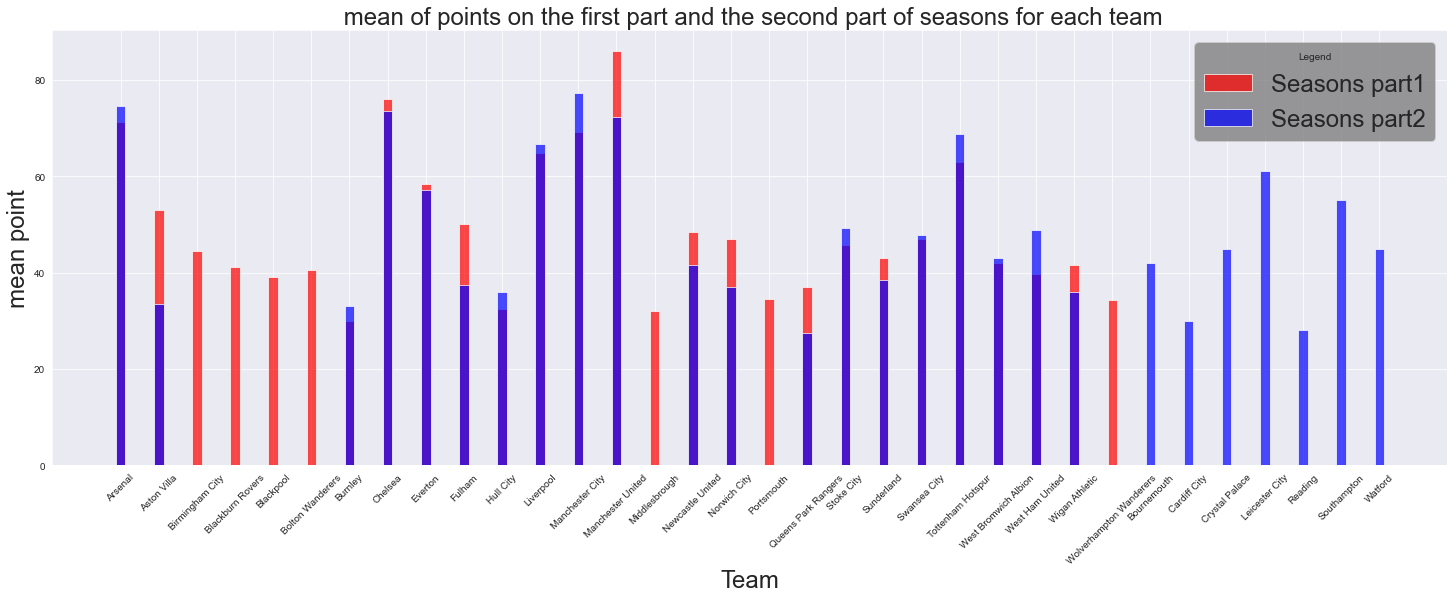

In [50]:
plt.subplots(figsize=(25,8))
part1_bar = plt.bar(locations, Moyen.moyenne_periode1, width, color='r', alpha=.7, label='Seasons part1')
part2_bar = plt.bar(locations, Moyen.moyenne_periode2, width, color='b', alpha=.7, label='Seasons part2')
plt.xticks(locations, labels)
plt.xticks(rotation=45)
plt.xlabel('Team', fontsize = 24)
plt.ylabel('mean point', fontsize = 24)
plt.title(' mean of points on the first part and the second part of seasons for each team', fontsize="24")
plt.legend(facecolor = 'gray', title = 'Legend',loc = 'upper right', fontsize = 24);

#### Fonction to get the progression of each team

In [40]:
def Calcul_progression(a_value, b_value):  
    res = 0
    if (a_value == 0):
        res = b_value
    elif (b_value == 0):
        res = -a_value
    elif (a_value >= b_value or a_value <= b_value):
        res = b_value - a_value
    return res
Moyen['progression'] = Moyen.apply(lambda x:Calcul_progression(x.moyenne_periode1,x.moyenne_periode2),axis=1)
Moyen

,moyenne_periode1,moyenne_periode2,progression
team,,,
Arsenal,71.250000,74.50,3.250000
Aston Villa,53.000000,33.50,-19.500000
Birmingham City,44.500000,0.00,-44.500000
Blackburn Rovers,41.250000,0.00,-41.250000
Blackpool,39.000000,0.00,-39.000000
Bolton Wanderers,40.500000,0.00,-40.500000
Burnley,30.000000,33.00,3.000000
Chelsea,76.000000,73.50,-2.500000
Everton,58.500000,57.25,-1.250000


## Conclusions
#### The team who is the most effective in attack

In [41]:
Max_goal = moyen_scored_conceded_goal.total_goal.max()
moyen_scored_conceded_goal[moyen_scored_conceded_goal['total_goal']==Max_goal]

,team,total_goal,total_conceded_goal
16,Manchester City,75.75,38.375


#### The team who who concedes the most goals

In [42]:
Max_conceded_goal = moyen_scored_conceded_goal.total_conceded_goal.max()
moyen_scored_conceded_goal[moyen_scored_conceded_goal['total_conceded_goal']==Max_conceded_goal]

,team,total_goal,total_conceded_goal
4,Blackpool,55.0,78.0


#### The team who is the most effective in defense

In [43]:
Max_defense = moyen_scored_conceded_goal.total_conceded_goal.min()
moyen_scored_conceded_goal[moyen_scored_conceded_goal['total_conceded_goal']==Max_defense]

,team,total_goal,total_conceded_goal
17,Manchester United,72.75,35.0


#### The team that has progressed the most and regressed the most

In [44]:
Max_progression = Moyen.progression.max()
Max_regression = Moyen.progression.min()

#### Max progression

In [45]:
Moyen[Moyen['progression'] == Max_progression]

,moyenne_periode1,moyenne_periode2,progression
team,,,
Leicester City,0.0,61.0,61.0


#### Max regression

In [46]:
Moyen[Moyen['progression'] == Max_regression]

,moyenne_periode1,moyenne_periode2,progression
team,,,
Birmingham City,44.5,0.0,-44.5


#### teams have progressed to the Premier League

In [47]:
Team_1 = Moyen.query('moyenne_periode1==0 & moyenne_periode2 > 0')
Team_1

,moyenne_periode1,moyenne_periode2,progression
team,,,
Bournemouth,0.0,42.0,42.0
Cardiff City,0.0,30.0,30.0
Crystal Palace,0.0,45.0,45.0
Leicester City,0.0,61.0,61.0
Reading,0.0,28.0,28.0
Southampton,0.0,55.0,55.0
Watford,0.0,45.0,45.0


#### teams descended to the lower league

In [48]:
Team_1 = Moyen.query('moyenne_periode1> 0 & moyenne_periode2 == 0')
Team_1

,moyenne_periode1,moyenne_periode2,progression
team,,,
Birmingham City,44.500000,0.0,-44.500000
Blackburn Rovers,41.250000,0.0,-41.250000
Blackpool,39.000000,0.0,-39.000000
Bolton Wanderers,40.500000,0.0,-40.500000
Middlesbrough,32.000000,0.0,-32.000000
Portsmouth,34.500000,0.0,-34.500000
Wolverhampton Wanderers,34.333333,0.0,-34.333333
